# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


# Load and Preprocess the images

In [2]:
img_dir = "D:\Covid-19 CT Scan Data\COVID-19_Lung_CT_Scans"

In [3]:
BATCH_SIZE = 128
IMAGE_SIZE = 128
input_shape = (128,128,1)

In [4]:
data_gen = ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              validation_split = 0.2)

In [5]:
train_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "grayscale",
                                        shuffle=True,
                                        class_mode = "binary",
                                        subset = "training")

Found 6752 images belonging to 2 classes.


In [6]:
val_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "grayscale",
                                        shuffle=True,
                                        class_mode = "binary",
                                        subset = "validation")

Found 1687 images belonging to 2 classes.


In [7]:
labels = train_gen.class_indices
classes = list(labels.keys())

print(classes)

['COVID-19', 'Non-COVID-19']


# Model Training ,Compilation , Evaluvation 

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D ,BatchNormalization, Flatten, Dropout

In [9]:
model = Sequential()
model.add(keras.layers.InputLayer(input_shape=input_shape))
model.add(Conv2D(16,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
#model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
#model.add(Dense(4, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

In [11]:
len(train_gen),len(val_gen)

(53, 14)

In [12]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_gen,verbose=1,epochs=10,validation_data=val_gen,steps_per_epoch = len(train_gen),validation_steps = len(val_gen))

C:\Users\NISCHITHA\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
53/53 [==============================] - 228s 4s/step - loss: 0.3474 - accuracy: 0.8864 - val_loss: 0.3727 - val_accuracy: 0.8886
Epoch 2/10
53/53 [==============================] - 101s 2s/step - loss: 0.2674 - accuracy: 0.9048 - val_loss: 0.3050 - val_accuracy: 0.8915
Epoch 3/10
53/53 [==============================] - 95s 2s/step - loss: 0.1999 - accuracy: 0.9265 - val_loss: 0.3227 - val_accuracy: 0.8856
Epoch 4/10
53/53 [==============================] - 93s 2s/step - loss: 0.1827 - accuracy: 0.9359 - val_loss: 0.3025 - val_accuracy: 0.9028
Epoch 5/10
53/53 [==============================] - 100s 2s/step - loss: 0.1392 - accuracy: 0.9505 - val_loss: 0.2825 - val_accuracy: 0.8957
Epoch 6/10
53/53 [==============================] - 100s 2s/step - loss: 0.1211 - accuracy: 0.9556 - val_loss: 0.2515 - val_accuracy: 0.9229
Epoch 7/10
53/53 [==============================] - 102s 2s/step - loss: 0.0950 - accuracy: 0.9656 - val_loss: 0.2766 - val_accuracy: 0.9188
Epoch 8/10
53/5

In [13]:
val_loss, val_accuracy = model.evaluate(val_gen)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

14/14 [==============================] - 13s 893ms/step - loss: 0.2094 - accuracy: 0.9425
Validation Accuracy: 94.25%


<Axes: >

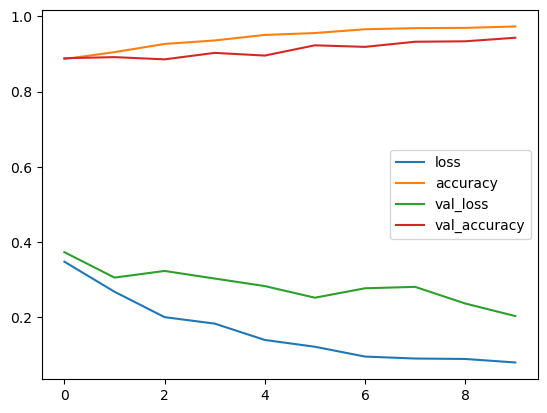

In [14]:
pd.DataFrame(history.history).plot()

In [15]:
model.save('CovidTest.h5')

# Testing On new Data(lung CT Image)

C:\Users\NISCHITHA\AppData\Local\Temp\ipykernel_17632\2029824107.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


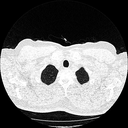

1/1 [==============================] - 0s 49ms/step
No COVID detected


C:\Users\NISCHITHA\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [16]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps


data = np.ndarray(shape=(1,128, 128, 1), dtype=np.float32)
image = Image.open(f"D:/Covid-19 CT Scan Data/COVID-19_Lung_CT_Scans/Non-COVID-19/Non-COVID-19_001.png")
size = (128, 128)
image = ImageOps.grayscale(image)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
display(image)

data = image_array.reshape((-1,128,128,1))/255

prediction = np.round(model.predict(data)[0][0])
if prediction == 0:
    print('COVID detected')
else:
    print('No COVID detected')